# Problem 2

## 2.1

In [1]:
cases <- read.csv("owid-covid-data.csv")

In [2]:
head(cases)

iso_code,continent,location,date,total_cases,new_cases,new_cases_smoothed,total_deaths,new_deaths,new_deaths_smoothed,...,male_smokers,handwashing_facilities,hospital_beds_per_thousand,life_expectancy,human_development_index,population,excess_mortality_cumulative_absolute,excess_mortality_cumulative,excess_mortality,excess_mortality_cumulative_per_million
AFG,Asia,Afghanistan,2020-02-24,5,5,NA,NA,NA,NA,...,NA,37.746,0.5,64.83,0.511,41128772,NA,NA,NA,NA
AFG,Asia,Afghanistan,2020-02-25,5,0,NA,NA,NA,NA,...,NA,37.746,0.5,64.83,0.511,41128772,NA,NA,NA,NA
AFG,Asia,Afghanistan,2020-02-26,5,0,NA,NA,NA,NA,...,NA,37.746,0.5,64.83,0.511,41128772,NA,NA,NA,NA
AFG,Asia,Afghanistan,2020-02-27,5,0,NA,NA,NA,NA,...,NA,37.746,0.5,64.83,0.511,41128772,NA,NA,NA,NA
AFG,Asia,Afghanistan,2020-02-28,5,0,NA,NA,NA,NA,...,NA,37.746,0.5,64.83,0.511,41128772,NA,NA,NA,NA
AFG,Asia,Afghanistan,2020-02-29,5,0,0.714,NA,NA,NA,...,NA,37.746,0.5,64.83,0.511,41128772,NA,NA,NA,NA


In [3]:
japan <- cases[cases$iso_code=='JPN',]

In [4]:
cases <- japan$new_cases
head(cases)

[1] NA  0  0  0  2  0

In [5]:
# Remove the first element because it is NA
cases <- cases[2:length(cases)]

## 2.2
Plot the time series and the logarithm of the time series

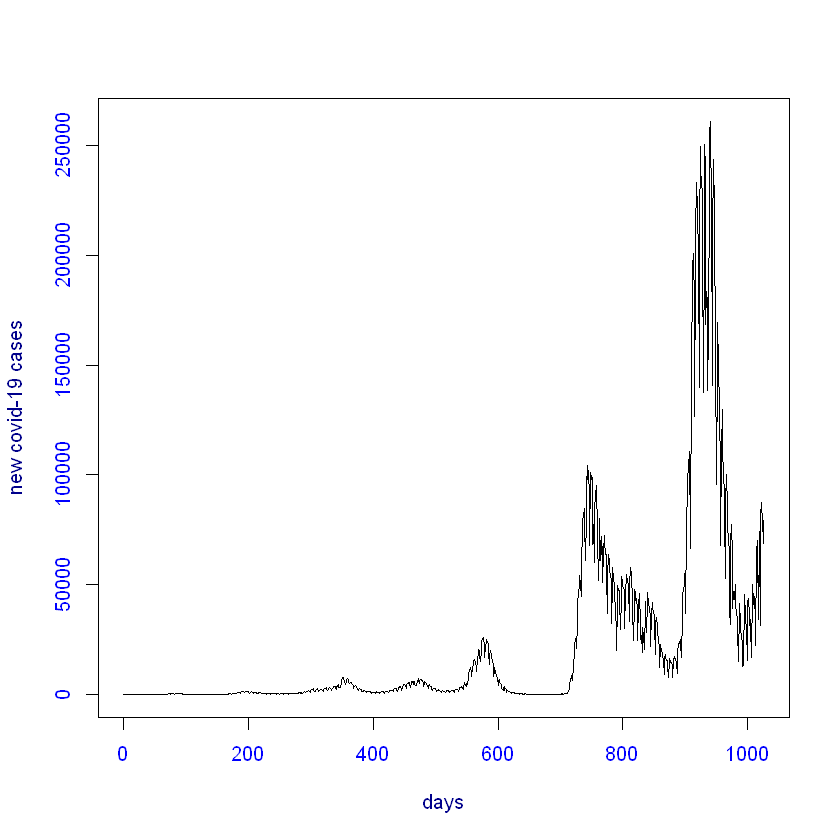

In [6]:
plot(x=c(1:length(cases)), y=cases, type = "l", main = "", xlab="", ylab="", col.axis="blue")

title(
      xlab = "days", ylab = "new covid-19 cases",
      cex.main = 2,   font.main= 4, col.main= "red",
      cex.sub = 0.75, font.sub = 3, col.sub = "green",
      col.lab ="darkblue"
      )

In [13]:
log.cases <- cases
# Replace all 0 with 1 to be able to apply the log function
log.cases[cases==0] <- 1

In [14]:
log.cases <- log(log.cases)

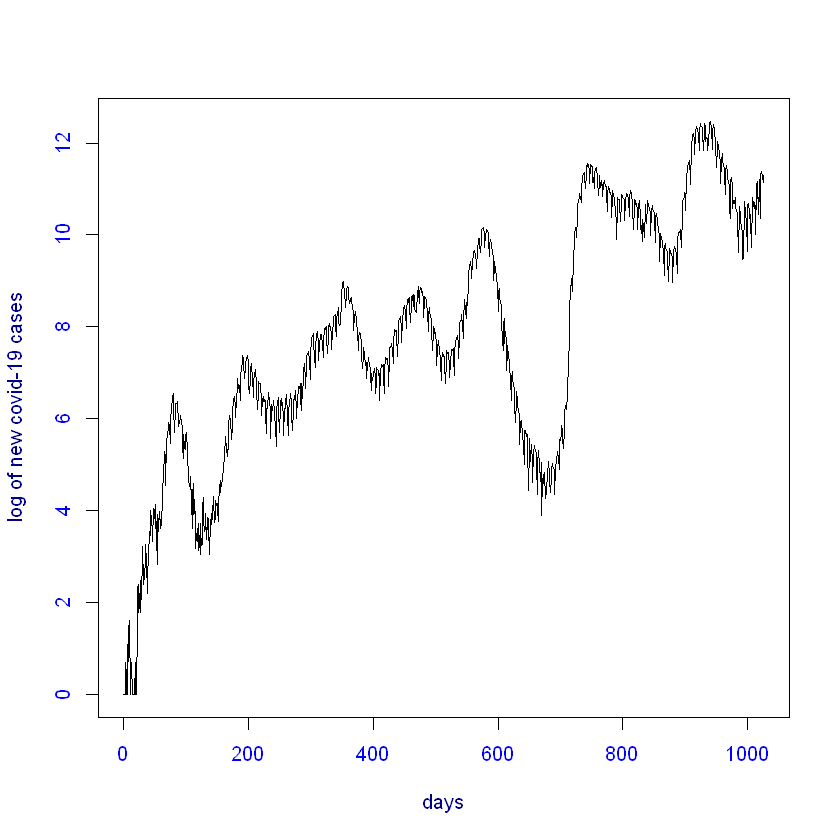

In [15]:
plot(x=c(1:length(cases)), y=log.cases, type = "l", main = "", xlab="", ylab="", col.axis="blue")

title(
      xlab = "days", ylab = "log of new covid-19 cases",
      cex.main = 2,   font.main= 1, col.main= "red",
      cex.sub = 0.75, font.sub = 3, col.sub = "green",
      col.lab ="darkblue"
      )

Construct the AR process model

In [16]:
cases.ts <- ts(cases)

In [17]:
log.cases.ts <- ts(log.cases)

In [19]:
cases.ar <- ar.yw(log.cases.ts)
cases.ar


Call:
ar.yw.default(x = log.cases.ts)

Coefficients:
      1        2        3        4        5        6        7        8  
 0.8808   0.0552  -0.0286   0.1252  -0.1112   0.0972   0.1021  -0.1012  
      9       10       11       12       13       14       15       16  
-0.0230   0.0743  -0.0838  -0.0344   0.0649   0.2012  -0.2164  -0.0086  
     17       18       19       20       21       22       23       24  
-0.0107  -0.0547   0.0896  -0.0970   0.1607  -0.1064  -0.0382   0.0079  
     25       26       27       28       29  
 0.0134   0.0067   0.0321   0.1125  -0.1214  

Order selected 29  sigma^2 estimated as  0.1394

In [20]:
cases.ar$order.max

[1] 30

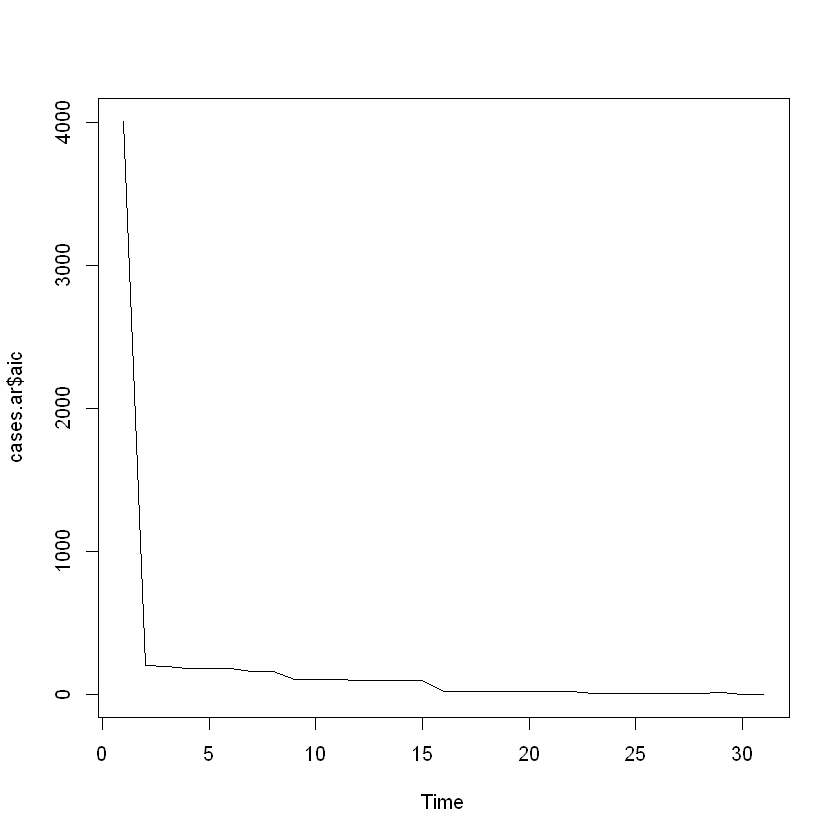

In [21]:
ts.plot(cases.ar$aic)

## 2.3

In [22]:
bootar1 <- function(x, B)
{
    nx <- length(x)  # Length of original sample
    mu <- mean(x)
    x.ar <- ar.yw(x, aic = F, order.max = 1)  # Compute AR(1) model with Yule-Walker method
    phi1 <- c(x.ar$ar[1])  # Autoregressive parameter
    d <- c(x.ar$resid[2:nx])  # Residuals
    
    # Matrix of size n x B with sampled residuals for all bootstrap samples
    gosa <- matrix(sample(d, size = nx * B, replace = T), nrow = B)
    data <- rep(0, nx)  # vector containing all generated data for a bootstrap sample
    beta <- rep(0, B)  # Vector containing all bootstrap autoregressive parameters
    for(b in 1:B){
        data[1] <- x[1]  # First data sample is kept as a constant
        for(i in 2:nx){
            data[i] <- (1 - phi1) * mu + phi1 * data[i - 1] + gosa[b, i]
        }
        data.ar <- ar.yw(data, aic = F, order.max = 1)
        beta[b] <- c(data.ar$ar[1])
    }
    return(beta)
}

In [24]:
bootar2 <- function(x, B)
{
    nx <- length(x)  # Length of original sample
    mu <- mean(x)
    x.ar <- ar.yw(x, aic = F, order.max = 2)  # Compute AR(2) model with Yule-Walker method
    phi1 <- c(x.ar$ar[1])  # Autoregressive parameter 1
    phi2 <- c(x.ar$ar[2])  # Autoregressive parameter 2
    d <- c(x.ar$resid[3:nx])  # Residuals
    
    # Matrix of size n x B with sampled residuals for all bootstrap samples
    gosa <- matrix(sample(d, size = nx * B, replace = T), nrow = B)
    data <- rep(0, nx)  # vector containing all generated data for a bootstrap sample
    beta <- matrix(0, nrow=B, ncol=2)  # matrix containing all bootstrap autoregressive parameters
    for(b in 1:B){
        data[1] <- x[1]  # First and second data sample is kept as a constant
        data[2] <- x[2]
        for(i in 3:nx){
            data[i] <- (1 - phi1 - phi2) * mu + phi1 * data[i - 1] + phi2 * data[i - 2] + gosa[b, i]
        }
        data.ar <- ar.yw(data, aic = F, order.max = 2)
        beta[b,1] <- c(data.ar$ar[1])
        beta[b,2] <- c(data.ar$ar[2])
    }
    return(beta)
}

## 2.4

In [25]:
beta1 <- bootar1(log.cases.ts, 200)

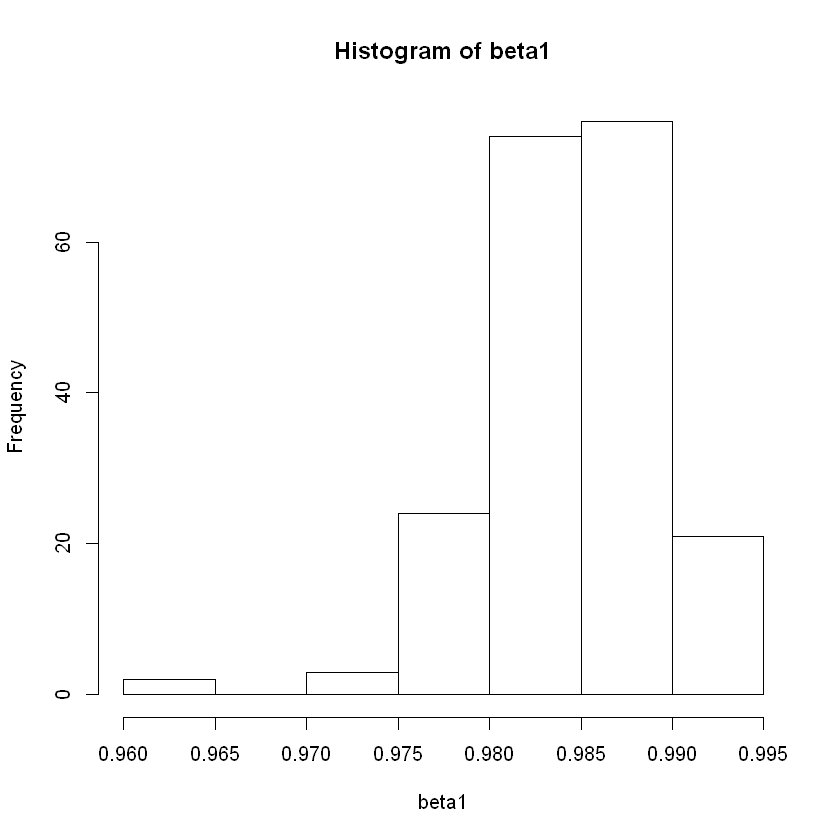

In [26]:
hist(beta1)

In [27]:
sqrt(var(beta1))

[1] 0.004619734

In [35]:
library(boot)
cases.fun <- function(tsb){
    ar.fit <- ar(tsb, aic=F, order.max=1)
    ar.fit$ar
}
cases.mb1 <- tsboot(ts=log.cases.ts, statistic=cases.fun, R=200, l=3, sim="fixed")
cases.mb2 <- tsboot(ts=log.cases.ts, statistic=cases.fun, R=200, l=7, sim="fixed")
cases.mb3 <- tsboot(ts=log.cases.ts, statistic=cases.fun, R=200, l=15, sim="fixed")

In [36]:
cases.mb1
cases.mb2
cases.mb3


BLOCK BOOTSTRAP FOR TIME SERIES

Fixed Block Length of 3 

Call:
tsboot(tseries = log.cases.ts, statistic = cases.fun, R = 200, 
    l = 3, sim = "fixed")


Bootstrap Statistics :
     original     bias    std. error
t1* 0.9876862 -0.3316123  0.01944812


BLOCK BOOTSTRAP FOR TIME SERIES

Fixed Block Length of 7 

Call:
tsboot(tseries = log.cases.ts, statistic = cases.fun, R = 200, 
    l = 7, sim = "fixed")


Bootstrap Statistics :
     original   bias    std. error
t1* 0.9876862 -0.14591  0.01399479


BLOCK BOOTSTRAP FOR TIME SERIES

Fixed Block Length of 15 

Call:
tsboot(tseries = log.cases.ts, statistic = cases.fun, R = 200, 
    l = 15, sim = "fixed")


Bootstrap Statistics :
     original      bias    std. error
t1* 0.9876862 -0.07032058  0.01173487

In [37]:
beta <- bootar2(log.cases.ts, 200)

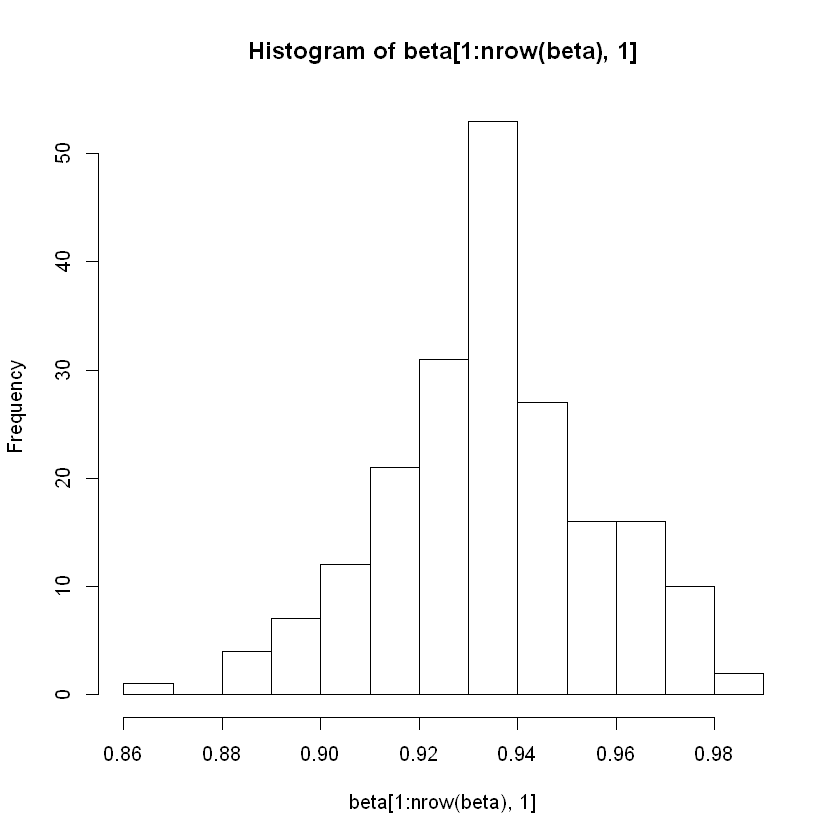

In [38]:
hist(beta[1:nrow(beta),1])

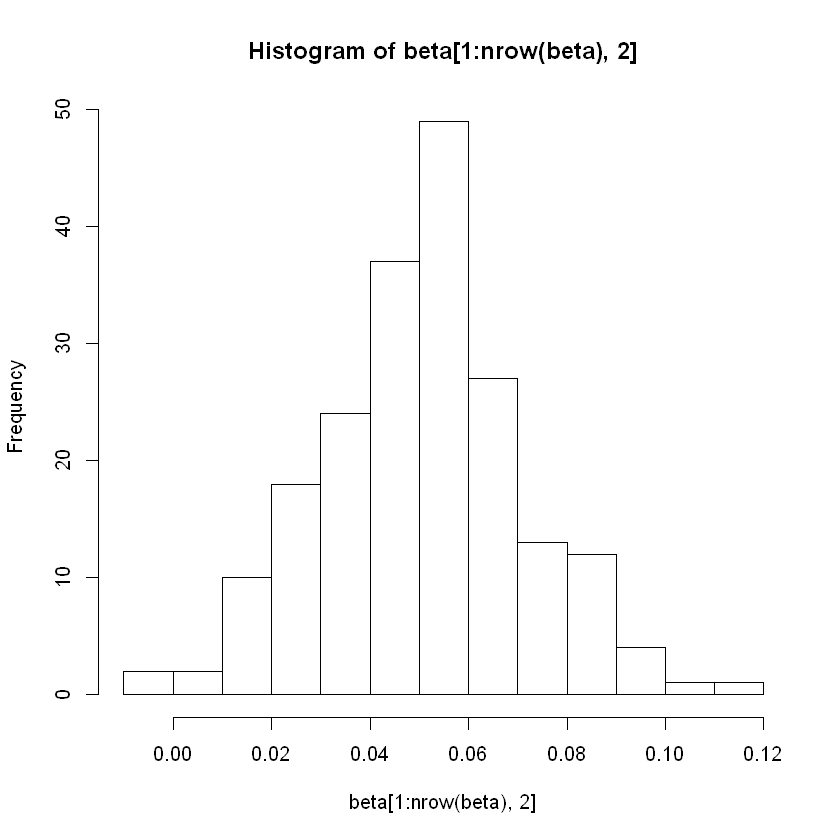

In [39]:
hist(beta[1:nrow(beta),2])

In [40]:
sqrt(var(beta[1:nrow(beta),1]))
sqrt(var(beta[1:nrow(beta),2]))

[1] 0.02137853

[1] 0.02078958

In [41]:
cases.fun <- function(tsb){
    ar.fit <- ar(tsb, aic=F, order.max=2)
    ar.fit$ar
}

In [42]:
cases.mb1 <- tsboot(ts=log.cases.ts, statistic=cases.fun, R=200, l=3, sim="fixed")
cases.mb2 <- tsboot(ts=log.cases.ts, statistic=cases.fun, R=200, l=7, sim="fixed")
cases.mb3 <- tsboot(ts=log.cases.ts, statistic=cases.fun, R=200, l=15, sim="fixed")

In [43]:
cases.mb1
cases.mb2
cases.mb3


BLOCK BOOTSTRAP FOR TIME SERIES

Fixed Block Length of 3 

Call:
tsboot(tseries = log.cases.ts, statistic = cases.fun, R = 200, 
    l = 3, sim = "fixed")


Bootstrap Statistics :
     original     bias    std. error
t1* 0.8955771 -0.1187638  0.02058578
t2* 0.0932574 -0.2793271  0.01883761


BLOCK BOOTSTRAP FOR TIME SERIES

Fixed Block Length of 7 

Call:
tsboot(tseries = log.cases.ts, statistic = cases.fun, R = 200, 
    l = 7, sim = "fixed")


Bootstrap Statistics :
     original       bias    std. error
t1* 0.8955771  0.001496598  0.02120756
t2* 0.0932574 -0.160244498  0.01975601


BLOCK BOOTSTRAP FOR TIME SERIES

Fixed Block Length of 15 

Call:
tsboot(tseries = log.cases.ts, statistic = cases.fun, R = 200, 
    l = 15, sim = "fixed")


Bootstrap Statistics :
     original      bias    std. error
t1* 0.8955771  0.03839277  0.02298682
t2* 0.0932574 -0.11398938  0.02408434